**SETUP**

In [1]:
!pip install umap

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import umap

**LOAD THE DATASET**

In [13]:
url = '/content/zoo.csv'
zoo_data = pd.read_csv(url)

zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
print(zoo_data.dtypes)

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object


**Preprocessing the Data**

In [22]:
zoo_data = zoo_data.drop('animal_name', axis=1)
X = zoo_data.iloc[:, :-1]
y = zoo_data.iloc[:, -1]

**Standardizing the features**

In [24]:
X = StandardScaler().fit_transform(X)

**Principal Component Analysis (PCA)**
PCA is a technique used to emphasize variation and capture strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA works by identifying the axes that maximize the variance, which often correspond to interesting patterns in the data. These axes become the principal components, which are new, uncorrelated features. PCA can also be used for noise reduction, feature extraction, and data compression.

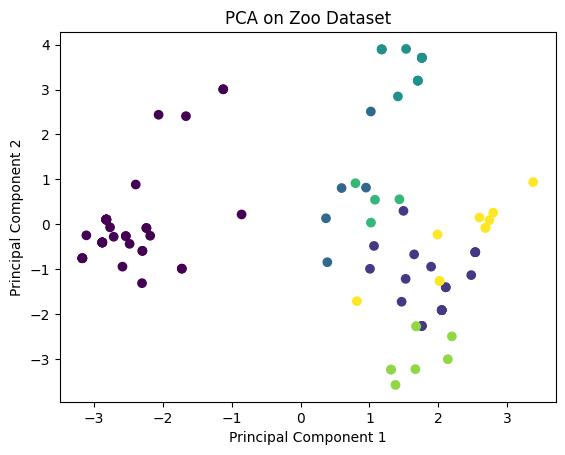

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA on Zoo Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Singular Value Decomposition (SVD)**
SVD is a matrix factorization method used in many statistical applications. In the context of dimensionality reduction, it decomposes a matrix into three other matrices and is closely related to PCA. It provides a method for transforming correlated variables into a set of uncorrelated ones that effectively summarize the information in the original dataset. This transformation is achieved by rotating the original data space to align with its principal components.

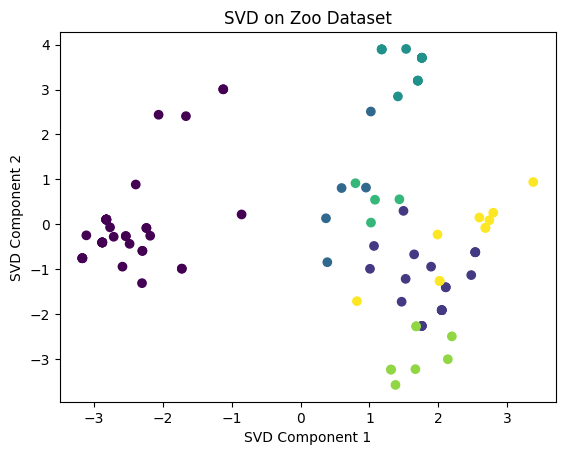

In [33]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Visualize the results
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis')
plt.title('SVD on Zoo Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


**Multidimensional Scaling (MDS)**
MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric space. The primary goal of MDS is to position each item in n-dimensional space such that the between-item distances are preserved as well as possible. It's particularly useful in visualizing the level of similarity of individual cases of a dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


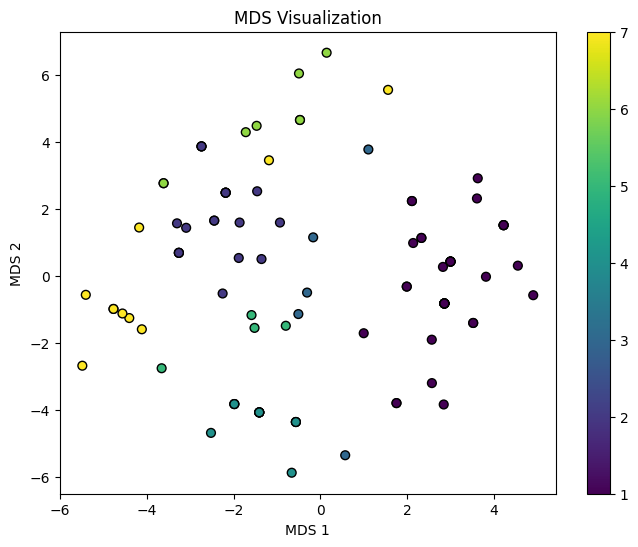

In [26]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('MDS Visualization')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar()
plt.show()


**Isometric Mapping (Isomap)**
Isomap is a nonlinear dimensionality reduction method. It's one of several widely used low-dimensional embedding methods. Isomap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points. The algorithm provides a simple method for estimating the intrinsic geometry of a data manifold based on a rough estimate of each data point's neighbors on the manifold.

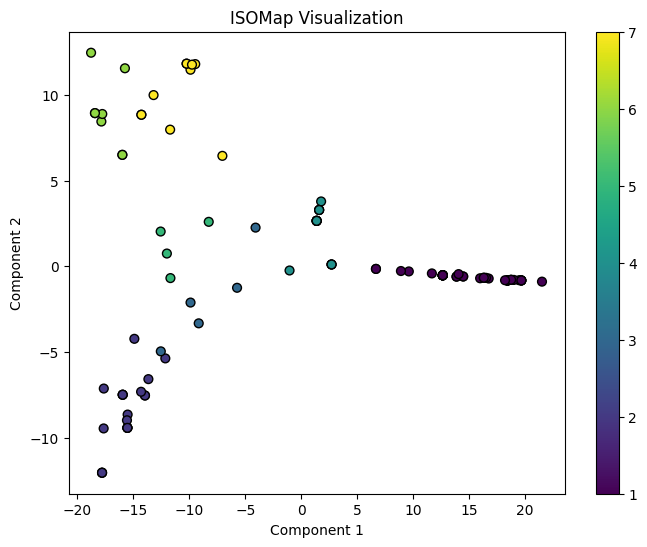

In [28]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('ISOMap Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


**Locally Linear Embedding (LLE)**
LLE is a nonlinear dimensionality reduction technique. It works by first measuring how each data point linearly relates to its closest neighbors and then seeking low-dimensional representations of the data that preserve these local relationships. LLE is particularly good at unraveling twisted and folded data structures, making it a powerful tool for visualizing complex datasets.

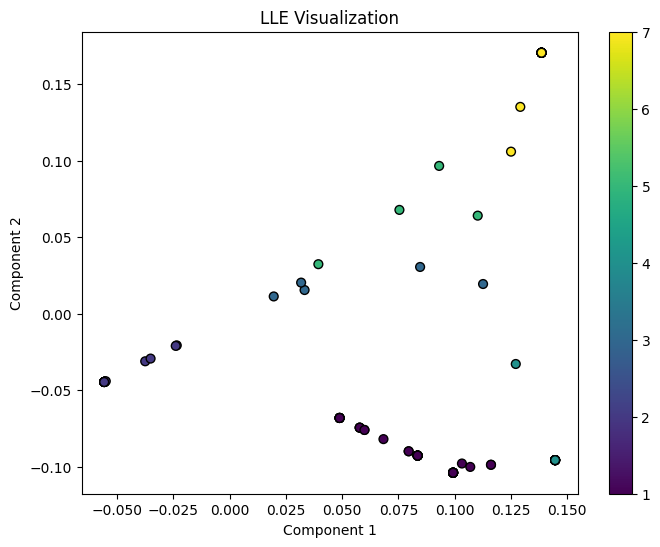

In [29]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('LLE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


**Uniform Manifold Approximation and Projection (UMAP)**
UMAP is a novel manifold learning technique for dimension reduction. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. The algorithm is competitive with t-SNE for visualization quality, while preserving more of the global structure with superior run time performance.

In [2]:
!pip install umap-learn


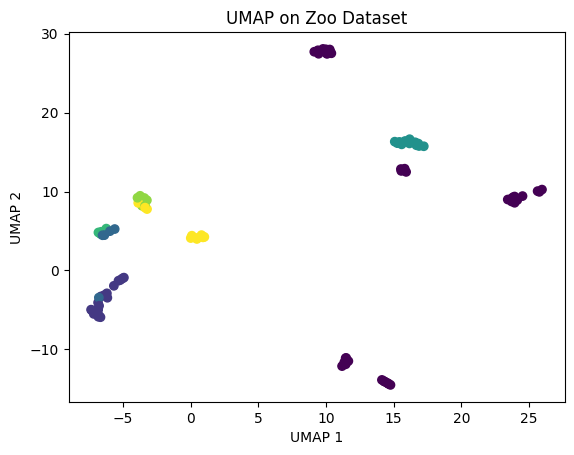

In [30]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
X_umap = umap_model.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.title('UMAP on Zoo Dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


**t-Distributed Stochastic Neighbor Embedding (t-SNE)**
t-SNE is a tool for visualizing high-dimensional data by reducing it to two or three dimensions. It converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities in the original high-dimensional space and the low-dimensional embedding. t-SNE is particularly well suited for the visualization of high-dimensional datasets and is widely used for that purpose.

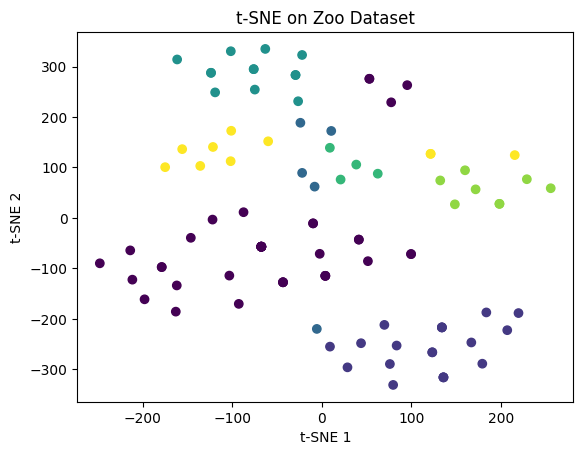

In [31]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE on Zoo Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
